In [52]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 1 - A Linear Regression model. Resales Price versus Flat Type over time'
     '</div>')

In [ ]:
## MACHINE LEARNING Model 1 - A Linear Regression model. Resales Price versus Flat Type over time

Mean Squared Error (MSE): 5194369915.213859
Root Mean Squared Error (RMSE): 72071.9773227699
R-squared (R²): 0.8068809275566823
Mean Absolute Error (MAE): 54498.6556327262


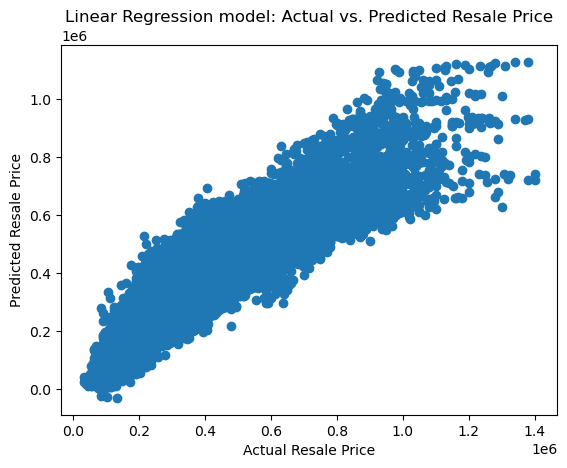

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Linear Regression model: Actual vs. Predicted Resale Price")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628591 entries, 0 to 628590
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                628591 non-null  datetime64[ns]
 1   town                 628591 non-null  object        
 2   flat type            628591 non-null  object        
 3   block                628591 non-null  object        
 4   street name          628591 non-null  object        
 5   storey range         628591 non-null  object        
 6   floor area sqm       628591 non-null  float64       
 7   flat model           628591 non-null  object        
 8   lease commence date  628591 non-null  int64         
 9   resale price         628591 non-null  float64       
 10  remaining Lease      628591 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 52.8+ MB


In [53]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 2 - Random Forest Regressor Model'
     '</div>')

In [5]:
## Machine Learning Model 2 - Random Forest Regressor Model

Mean Squared Error (MSE): 1923369010.6336012
Root Mean Squared Error (RMSE): 43856.231149445586
R-squared (R²): 0.9284919546811886
Mean Absolute Error (MAE): 29068.59044440389


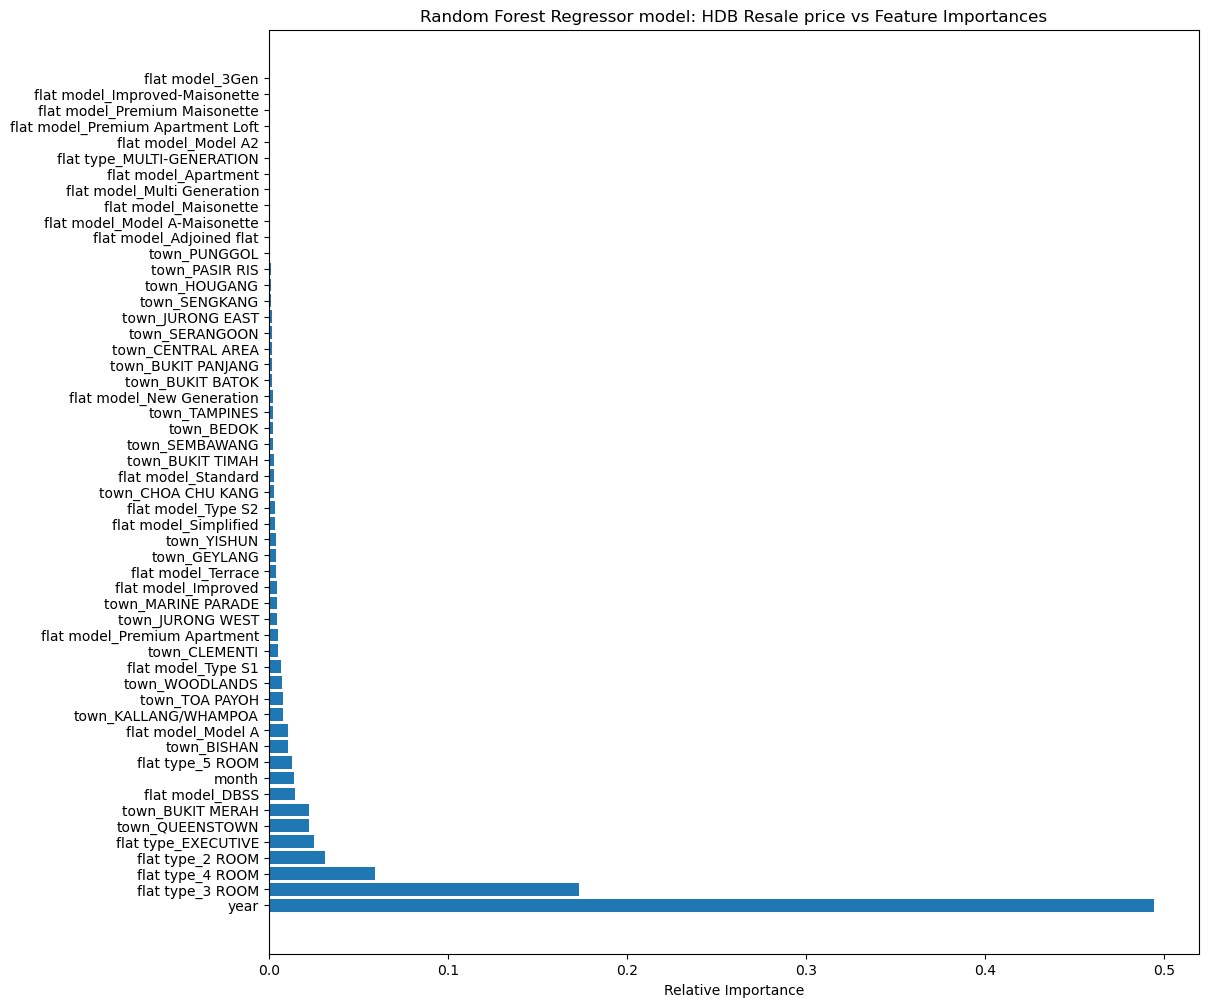

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Feature importance chart
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.title("Random Forest Regressor model: HDB Resale price vs Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [54]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 3 - Decision Tree Regressor Model'
     '</div>')

In [ ]:
## Machine Learning Model 3 - Decision Tree Regressor Model

Mean Squared Error (MSE): 2029172233.9206219
Root Mean Squared Error (RMSE): 45046.33430059123
R-squared (R²): 0.9245583456629212
Mean Absolute Error (MAE): 29603.448675395186


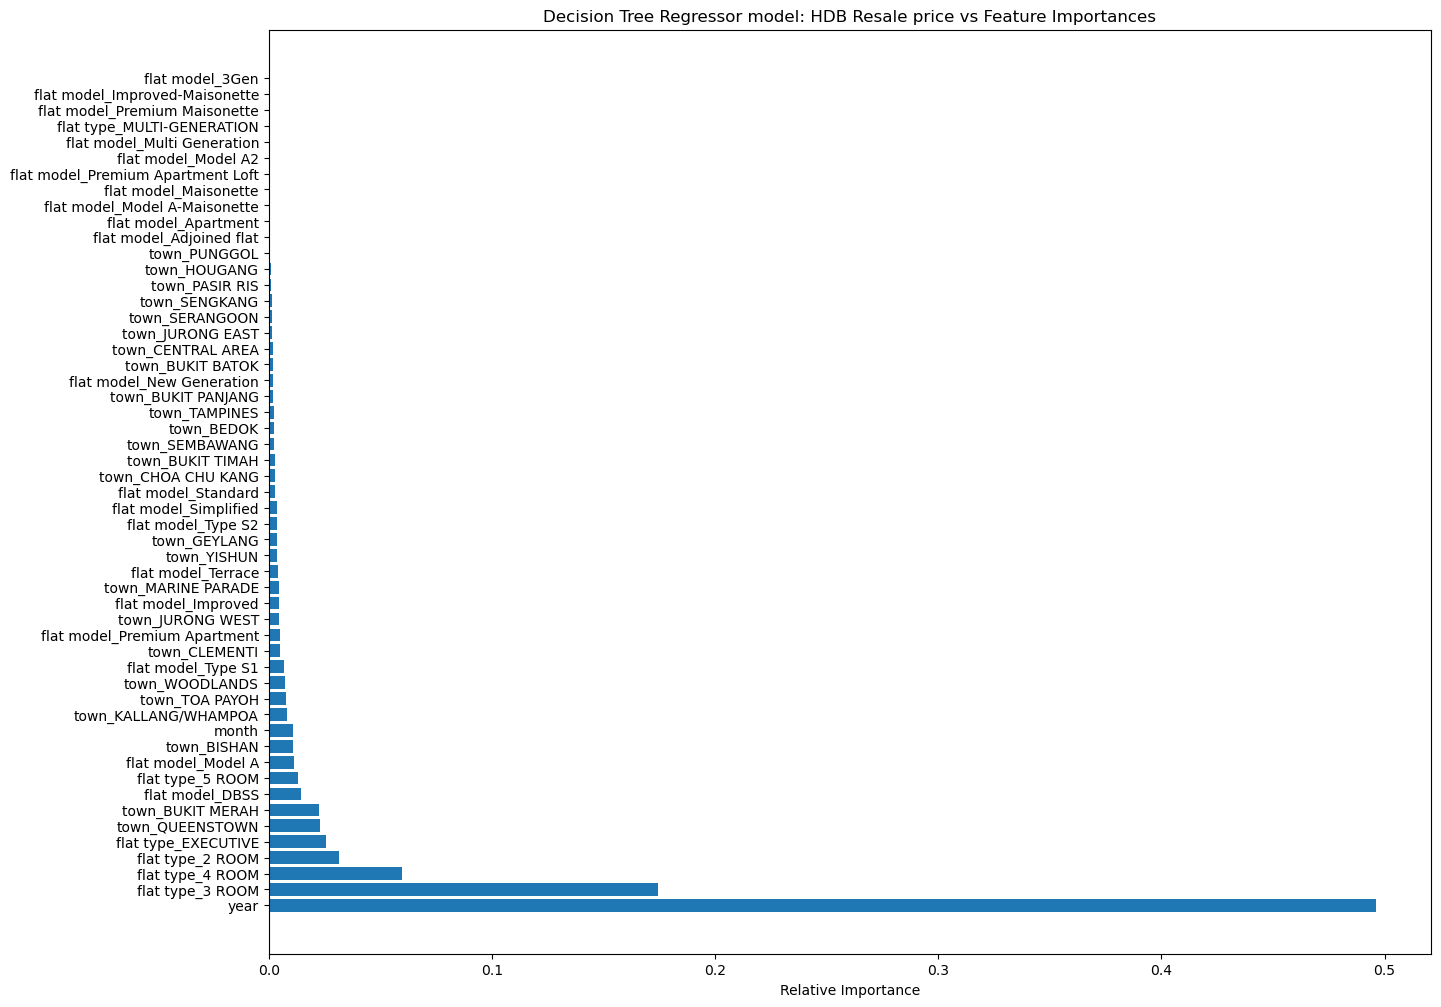

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()  # Clean column names
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Feature importance chart
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 12))
plt.title("Decision Tree Regressor model: HDB Resale price vs Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Provide solid Decision Tree-based model to predict resale prices, along with clear evaluations and insights into the most important features.

In [ ]:
EXTRA INFORMATION:

ML links for regression model for resale price:
https://scikit-learn.org/1.5/supervised_learning.html
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html

five commonly used regression models for predicting property prices:

1. Linear Regression
Description: A simple model that assumes a linear relationship between the input features (e.g., square footage, number of rooms) and 
the target variable (property price).
When to Use: It's a good starting point for regression tasks but may not capture non-linear relationships effectively.

2. Random Forest Regressor
Description: An ensemble model that constructs multiple decision trees and combines their outputs. 
Random Forest models can handle both linear and non-linear relationships.
When to Use: Effective for handling high-dimensional data, capturing interactions between features, and dealing with non-linearities in property prices.

3. Decision Tree Regressor
Description: A non-linear model that splits the data into subsets based on feature values.
It's easy to interpret but can overfit if not tuned properly.
When to Use: Suitable for smaller datasets or when interpretability is crucial. It can capture complex relationships but 
may require pruning to prevent overfitting.

4. Gradient Boosting Regressor (e.g., XGBoost, LightGBM)
Description: A boosting technique that combines weak models (typically decision trees) to create a strong predictor. 
Models like XGBoost and LightGBM are highly efficient and effective for regression tasks.
When to Use: Excellent for high-dimensional datasets and complex relationships, providing state-of-the-art performance for property price predictions.

5. Support Vector Regression (SVR)
Description: A version of support vector machines designed for regression tasks. SVR tries to find a hyperplane that best fits 
the data within a certain margin.
When to Use: Best for datasets with smaller sample sizes, where the relationship between features and prices is complex and non-linear.
Each of these models can be effective for property price prediction depending on the characteristics of your data (such as size, 
non-linearity, and noise levels).

In [ ]:
# End of Machine Learning Models

In [2]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'END OF MACHINE LEARNING MODEL'
     '</div>')